In [2]:
! pip install tensorflow

     |████████████████████████████████| 175.5 MB 40 kB/s  eta 0:00:01    |███▌                            | 19.3 MB 579 kB/s eta 0:04:30     |███████████████▏                | 83.1 MB 682 kB/s eta 0:02:16
     |████████████████████████████████| 1.0 MB 611 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 743 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 602 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 619 kB/s eta 0:00:01
     |████████████████████████████████| 127 kB 641 kB/s eta 0:00:01
Processing /Users/anuragbisht/Library/Caches/pip/wheels/b1/c2/ed/d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a/wrapt-1.12.1-cp38-none-any.whl
     |████████████████████████████████| 42 kB 629 kB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 704 kB/s eta 0:00:01    |██████████████████▌             | 6.1 MB 501 kB/s eta 0:00:09
     |████████████████████████████████| 

In [3]:
# Importing the libraries
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import * 
print('Imported Successfully!')

Imported Successfully!


In [4]:
# create the model architecture

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 128)       0

In [5]:
"""
process the images
So, let’s process our training and validation images, 
which you downloaded from the link provided in the previous lesson.

We used ImageDataGenerator, which will generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches). This will help prevent over-fitting as we have a very small dataset.
The parameters that we passed are:
rescale - used to rescale the data values.
shear_range - specifies the shear angle counter-clockwise in degrees.
zoom_range - specifies the range of zoom for an image.
horizontal_flip - a boolean value which tells whether to flip the image horizontally or not.
"""

train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

print('Created the Data Generator Objects.')

Created the Data Generator Objects.


In [6]:
"""
Load the dataset
"""
train_generator = train_datagen.flow_from_directory('./Train',target_size=(224,224),batch_size=32, class_mode="binary")
val_generator = test_datagen.flow_from_directory('./Val',target_size=(224,224),batch_size=32, class_mode="binary")

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [13]:
!pip install opencv-python

     |████████████████████████████████| 40.3 MB 3.3 MB/s eta 0:00:01


In [14]:
import os
import cv2
import numpy as np

labels = ['Covid', 'Normal']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [15]:
train = get_data('./Train')
val = get_data('./Val')

<ipython-input-14-062afabb7019>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

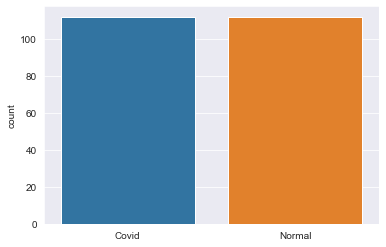

In [19]:
import seaborn as sns
l = []
for i in train:
    if(i[1] == 0):
        l.append("Covid")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Covid')

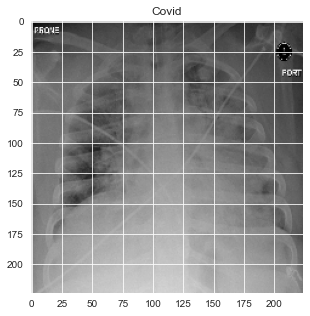

In [20]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Normal')

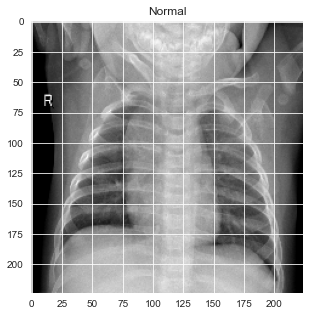

In [21]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [16]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [7]:
"""
train the model

"""
hist = model.fit(train_generator, epochs = 6, validation_data=val_generator, validation_steps=2)

Epoch 1/6
7/7 [==============================] - 61s 8s/step - loss: 4.0496 - accuracy: 0.4768 - val_loss: 0.6194 - val_accuracy: 0.5333
Epoch 2/6
7/7 [==============================] - 55s 8s/step - loss: 0.5183 - accuracy: 0.7390 - val_loss: 0.5379 - val_accuracy: 0.9333
Epoch 3/6
7/7 [==============================] - 61s 8s/step - loss: 0.3381 - accuracy: 0.8910 - val_loss: 0.2573 - val_accuracy: 0.9667
Epoch 4/6
7/7 [==============================] - 62s 9s/step - loss: 0.3462 - accuracy: 0.8602 - val_loss: 0.1925 - val_accuracy: 0.9500
Epoch 5/6
7/7 [==============================] - 58s 8s/step - loss: 0.3131 - accuracy: 0.8892 - val_loss: 0.3674 - val_accuracy: 0.8500
Epoch 6/6
7/7 [==============================] - 61s 8s/step - loss: 0.2450 - accuracy: 0.8827 - val_loss: 0.1330 - val_accuracy: 0.9667


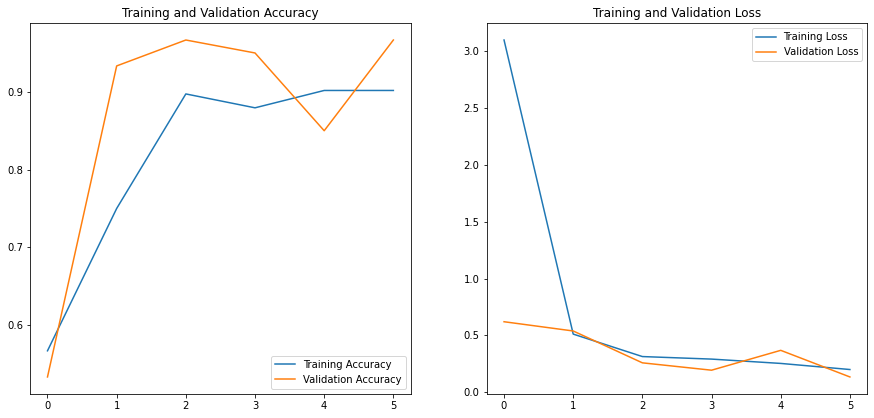

In [9]:
"""
Evaluate the results
"""
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

2/2 - 4s - loss: 0.1339 - accuracy: 0.9667


In [17]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Class 0','Class 1']))

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        30
     Class 1       1.00      0.93      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

